In [2]:
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import time
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [3]:
data = np.load(r'C:\Users\Vee\Desktop\HW01\HW01\Data\dataA\train.npy')

In [4]:
data.shape

(1342, 7)

In [5]:
x = data[:,:6]

In [6]:
x.shape

(1342, 6)

In [7]:
y = data[:,6:]

In [8]:
y.shape

(1342, 1)

In [70]:
#splitting data into train and test sets. 3/4 train, 1/4 test.
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.5, shuffle=True, random_state=69)

In [71]:
model = Sequential()
model.add(Dense(350, input_dim=6))
model.add(Dense(350))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.1))
model.add(Dense(350))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.1))
model.add(Dense(350, activation = 'tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer='Adamax', loss='mean_absolute_error')
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 350)               2450      
_________________________________________________________________
dense_53 (Dense)             (None, 350)               122850    
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 350)               0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 350)               122850    
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 350)               0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 350)             

In [72]:
# Configure the checkpoint :
checkpoint = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=50, verbose=1, mode='auto', restore_best_weights=True)
callbacks_list = [checkpoint]

In [73]:
history = model.fit(x_train, y_train, epochs=2500, batch_size=1342, verbose=1,validation_data=(x_test, y_test),callbacks=callbacks_list)

Train on 671 samples, validate on 671 samples
Epoch 1/2500
671/671 [==============================] - 0s 546us/step - loss: 14.7761 - val_loss: 13.6949
Epoch 2/2500
671/671 [==============================] - 0s 28us/step - loss: 13.4394 - val_loss: 12.0570
Epoch 3/2500
671/671 [==============================] - 0s 28us/step - loss: 11.8071 - val_loss: 9.7162
Epoch 4/2500
671/671 [==============================] - 0s 25us/step - loss: 9.4794 - val_loss: 6.7219
Epoch 5/2500
671/671 [==============================] - 0s 25us/step - loss: 6.5175 - val_loss: 3.7429
Epoch 6/2500
671/671 [==============================] - 0s 25us/step - loss: 3.6654 - val_loss: 3.5492
Epoch 7/2500
671/671 [==============================] - 0s 27us/step - loss: 3.4808 - val_loss: 4.8021
Epoch 8/2500
671/671 [==============================] - 0s 24us/step - loss: 4.7636 - val_loss: 5.3894
Epoch 9/2500
671/671 [==============================] - 0s 27us/step - loss: 5.3577 - val_loss: 5.3481
Epoch 10/2500
671/671

Epoch 80/2500
671/671 [==============================] - 0s 25us/step - loss: 1.6465 - val_loss: 1.6766
Epoch 81/2500
671/671 [==============================] - 0s 25us/step - loss: 1.5984 - val_loss: 1.6607
Epoch 82/2500
671/671 [==============================] - 0s 25us/step - loss: 1.5833 - val_loss: 1.6405
Epoch 83/2500
671/671 [==============================] - 0s 24us/step - loss: 1.6035 - val_loss: 1.6221
Epoch 84/2500
671/671 [==============================] - 0s 27us/step - loss: 1.5695 - val_loss: 1.6045
Epoch 85/2500
671/671 [==============================] - 0s 25us/step - loss: 1.5297 - val_loss: 1.5916
Epoch 86/2500
671/671 [==============================] - 0s 25us/step - loss: 1.5193 - val_loss: 1.5777
Epoch 87/2500
671/671 [==============================] - 0s 25us/step - loss: 1.5344 - val_loss: 1.5539
Epoch 88/2500
671/671 [==============================] - 0s 25us/step - loss: 1.5116 - val_loss: 1.5331
Epoch 89/2500
671/671 [==============================] - 0s 27us

Epoch 159/2500
671/671 [==============================] - 0s 24us/step - loss: 1.0616 - val_loss: 1.0262
Epoch 160/2500
671/671 [==============================] - 0s 22us/step - loss: 1.0701 - val_loss: 1.0317
Epoch 161/2500
671/671 [==============================] - 0s 25us/step - loss: 1.0672 - val_loss: 1.0243
Epoch 162/2500
671/671 [==============================] - 0s 24us/step - loss: 1.0289 - val_loss: 1.0410
Epoch 163/2500
671/671 [==============================] - 0s 24us/step - loss: 1.0758 - val_loss: 1.0141
Epoch 164/2500
671/671 [==============================] - 0s 24us/step - loss: 1.0685 - val_loss: 1.0345
Epoch 165/2500
671/671 [==============================] - 0s 25us/step - loss: 1.0540 - val_loss: 1.0174
Epoch 166/2500
671/671 [==============================] - 0s 24us/step - loss: 1.0543 - val_loss: 1.0004
Epoch 167/2500
671/671 [==============================] - 0s 24us/step - loss: 1.0369 - val_loss: 0.9977
Epoch 168/2500
671/671 [==============================]

671/671 [==============================] - 0s 24us/step - loss: 0.8220 - val_loss: 0.7995
Epoch 238/2500
671/671 [==============================] - 0s 22us/step - loss: 0.8902 - val_loss: 0.7552
Epoch 239/2500
671/671 [==============================] - 0s 24us/step - loss: 0.8167 - val_loss: 0.8323
Epoch 240/2500
671/671 [==============================] - 0s 24us/step - loss: 0.8613 - val_loss: 0.7474
Epoch 241/2500
671/671 [==============================] - 0s 22us/step - loss: 0.8496 - val_loss: 0.7875
Epoch 242/2500
671/671 [==============================] - 0s 22us/step - loss: 0.8856 - val_loss: 0.8331
Epoch 243/2500
671/671 [==============================] - 0s 25us/step - loss: 0.9022 - val_loss: 0.8005
Epoch 244/2500
671/671 [==============================] - 0s 24us/step - loss: 0.8625 - val_loss: 0.7870
Epoch 245/2500
671/671 [==============================] - 0s 27us/step - loss: 0.8665 - val_loss: 0.7472
Epoch 246/2500
671/671 [==============================] - 0s 24us/step

Epoch 316/2500
671/671 [==============================] - 0s 24us/step - loss: 0.6900 - val_loss: 0.5586
Epoch 317/2500
671/671 [==============================] - 0s 24us/step - loss: 0.6835 - val_loss: 0.5549
Epoch 318/2500
671/671 [==============================] - 0s 24us/step - loss: 0.6710 - val_loss: 0.5360
Epoch 319/2500
671/671 [==============================] - 0s 24us/step - loss: 0.6692 - val_loss: 0.5519
Epoch 320/2500
671/671 [==============================] - 0s 25us/step - loss: 0.6423 - val_loss: 0.5310
Epoch 321/2500
671/671 [==============================] - 0s 24us/step - loss: 0.6387 - val_loss: 0.5567
Epoch 322/2500
671/671 [==============================] - 0s 24us/step - loss: 0.6486 - val_loss: 0.5430
Epoch 323/2500
671/671 [==============================] - 0s 24us/step - loss: 0.6483 - val_loss: 0.5200
Epoch 324/2500
671/671 [==============================] - 0s 24us/step - loss: 0.6601 - val_loss: 0.5390
Epoch 325/2500
671/671 [==============================]

671/671 [==============================] - 0s 27us/step - loss: 0.5532 - val_loss: 0.3369
Epoch 395/2500
671/671 [==============================] - 0s 25us/step - loss: 0.5313 - val_loss: 0.3537
Epoch 396/2500
671/671 [==============================] - 0s 25us/step - loss: 0.5759 - val_loss: 0.4399
Epoch 397/2500
671/671 [==============================] - 0s 27us/step - loss: 0.5600 - val_loss: 0.3673
Epoch 398/2500
671/671 [==============================] - 0s 27us/step - loss: 0.5537 - val_loss: 0.3651
Epoch 399/2500
671/671 [==============================] - 0s 27us/step - loss: 0.5735 - val_loss: 0.3799
Epoch 400/2500
671/671 [==============================] - 0s 27us/step - loss: 0.5455 - val_loss: 0.3439
Epoch 401/2500
671/671 [==============================] - 0s 28us/step - loss: 0.5185 - val_loss: 0.3697
Epoch 402/2500
671/671 [==============================] - 0s 24us/step - loss: 0.5804 - val_loss: 0.4399
Epoch 403/2500
671/671 [==============================] - 0s 25us/step

Epoch 473/2500
671/671 [==============================] - 0s 24us/step - loss: 0.4989 - val_loss: 0.3198
Epoch 474/2500
671/671 [==============================] - 0s 22us/step - loss: 0.4911 - val_loss: 0.3417
Epoch 475/2500
671/671 [==============================] - 0s 24us/step - loss: 0.5299 - val_loss: 0.2957
Epoch 476/2500
671/671 [==============================] - 0s 25us/step - loss: 0.5289 - val_loss: 0.2948
Epoch 477/2500
671/671 [==============================] - 0s 25us/step - loss: 0.5024 - val_loss: 0.4434
Epoch 478/2500
671/671 [==============================] - 0s 25us/step - loss: 0.5384 - val_loss: 0.2967
Epoch 479/2500
671/671 [==============================] - 0s 24us/step - loss: 0.5409 - val_loss: 0.2711
Epoch 480/2500
671/671 [==============================] - 0s 24us/step - loss: 0.5181 - val_loss: 0.6406
Epoch 481/2500
671/671 [==============================] - 0s 22us/step - loss: 0.6455 - val_loss: 0.3078
Epoch 482/2500
671/671 [==============================]

671/671 [==============================] - 0s 25us/step - loss: 0.4994 - val_loss: 0.3355
Epoch 552/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4658 - val_loss: 0.2318
Epoch 553/2500
671/671 [==============================] - 0s 24us/step - loss: 0.4542 - val_loss: 0.2677
Epoch 554/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4684 - val_loss: 0.2921
Epoch 555/2500
671/671 [==============================] - 0s 27us/step - loss: 0.4904 - val_loss: 0.3118
Epoch 556/2500
671/671 [==============================] - 0s 24us/step - loss: 0.4773 - val_loss: 0.2472
Epoch 557/2500
671/671 [==============================] - 0s 24us/step - loss: 0.4341 - val_loss: 0.2475
Epoch 558/2500
671/671 [==============================] - 0s 24us/step - loss: 0.4918 - val_loss: 0.2754
Epoch 559/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4615 - val_loss: 0.2942
Epoch 560/2500
671/671 [==============================] - 0s 27us/step

Epoch 630/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4566 - val_loss: 0.2190
Epoch 631/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4687 - val_loss: 0.3773
Epoch 632/2500
671/671 [==============================] - 0s 27us/step - loss: 0.4586 - val_loss: 0.3242
Epoch 633/2500
671/671 [==============================] - 0s 24us/step - loss: 0.4367 - val_loss: 0.2953
Epoch 634/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4950 - val_loss: 0.2316
Epoch 635/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4201 - val_loss: 0.5024
Epoch 636/2500
671/671 [==============================] - 0s 25us/step - loss: 0.5280 - val_loss: 0.2390
Epoch 637/2500
671/671 [==============================] - 0s 27us/step - loss: 0.4253 - val_loss: 0.2669
Epoch 638/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4728 - val_loss: 0.3759
Epoch 639/2500
671/671 [==============================]

671/671 [==============================] - 0s 27us/step - loss: 0.4545 - val_loss: 0.2205
Epoch 709/2500
671/671 [==============================] - 0s 24us/step - loss: 0.4307 - val_loss: 0.2248
Epoch 710/2500
671/671 [==============================] - 0s 22us/step - loss: 0.4178 - val_loss: 0.3791
Epoch 711/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4391 - val_loss: 0.2157
Epoch 712/2500
671/671 [==============================] - 0s 24us/step - loss: 0.4224 - val_loss: 0.2097
Epoch 713/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4448 - val_loss: 0.3579
Epoch 714/2500
671/671 [==============================] - 0s 24us/step - loss: 0.4561 - val_loss: 0.2284
Epoch 715/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4100 - val_loss: 0.2140
Epoch 716/2500
671/671 [==============================] - 0s 24us/step - loss: 0.4359 - val_loss: 0.3507
Epoch 717/2500
671/671 [==============================] - 0s 24us/step

Epoch 787/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4175 - val_loss: 0.2110
Epoch 788/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4257 - val_loss: 0.2141
Epoch 789/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4166 - val_loss: 0.4758
Epoch 790/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4920 - val_loss: 0.2494
Epoch 791/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4666 - val_loss: 0.2130
Epoch 792/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4320 - val_loss: 0.3906
Epoch 793/2500
671/671 [==============================] - 0s 24us/step - loss: 0.4558 - val_loss: 0.2089
Epoch 794/2500
671/671 [==============================] - 0s 25us/step - loss: 0.4131 - val_loss: 0.2372
Epoch 795/2500
671/671 [==============================] - 0s 27us/step - loss: 0.4533 - val_loss: 0.3099
Epoch 796/2500
671/671 [==============================]

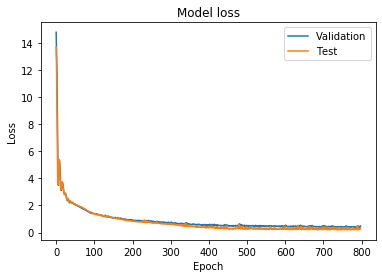

In [74]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Test'], loc='upper right')
plt.show()

In [75]:
y_1 = model.predict(x)
y_1 = y_1.reshape(len(y_1),1)

In [76]:
np.sum(abs(y - y_1))/len(y)

0.1604542962098945

In [77]:
noise = np.random.rand(10000,6)

In [78]:
y_2 = model.predict(noise)
y_2 = y_2.reshape(len(y_2),1)

In [83]:
cheese = np.concatenate((noise,y_2),axis=1)
pred = np.concatenate((x,y_1),axis=1)
newdata = np.concatenate((pred,cheese),axis=0)

In [84]:
data = np.load(r'C:\Users\Vee\Desktop\HW01\HW01\Data\dataA\test.npy')
submission = model.predict(data)
submission = submission.reshape(len(submission),1)

In [85]:
cheese2 = np.concatenate((data,submission),axis=1)
newdata2 = np.concatenate((newdata,cheese2),axis=0)
np.save('synthethic_data_A.npy',newdata2)

In [92]:
import csv
ids = 1. + np.arange(submission.shape[0])[None].T
kaggle_predictions = np.hstack((ids,submission))
writer = csv.writer(open('submission.csv', 'w'))
if submission.shape[1] == 1:
    writer.writerow(['# id','Prediction'])
elif submission.shape[1] == 2:
    writer.writerow(['# id','Prediction1', 'Prediction2'])
writer.writerows(kaggle_predictions)